[View in Colaboratory](https://colab.research.google.com/github/koichi-inoue/JupyterNotebook/blob/master/LinearRegression.ipynb)

# データ・ライブラリの準備

In [37]:
# 手元のデータをここ（Google Collaboratory）に読み込むためのダイアログを表示
from google.colab import files
uploaded = files.upload()

Saving winequality-red.csv to winequality-red (6).csv


In [87]:
# データ解析ライブラリ Pandas の読み込み
import pandas as pd

# 数値計算ライブラリ NumPy の読み込み
import numpy as np

# グラフ描画ライブラリ matplotlib の読み込み
import matplotlib.pyplot as plt

# linear_model.LinearRegression クラスを読み込み
from sklearn import linear_model
clf = linear_model.LinearRegression()

# Wineデータセットの読み込み
import io
wine = pd.read_csv(io.StringIO(uploaded['winequality-red.csv'].decode('utf-8')))
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5.0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5.0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6.0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5.0


# 単回帰分析
alcohl を目的変数、density を説明変数とした、回帰分析
機械学習ライブラリ scikit-learn を用いています

In [88]:
# 説明変数
X = wine.loc[:,['density']].as_matrix()

# 目的変数に "alcohol (アルコール度数)" を利用
Y = wine.loc[:,['alcohol']].as_matrix()

# 予測モデルを作成
clf.fit(X, Y)
 
# 回帰係数 a
print(clf.coef_)
 
# 切片 (誤差) b
print(clf.intercept_)
 
# 決定係数
print(clf.score(X, Y))


[[-280.16382307]]
[289.67534339]
0.2461943643998733


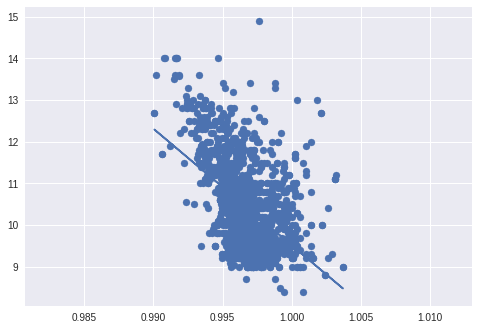

In [89]:
# 散布図
plt.scatter(X, Y)
 
# 回帰直線
plt.plot(X, clf.predict(X))

# 重回帰分析
quality を目的変数、その他を説明変数として、重回帰分析を行います。

In [90]:
# 説明変数：quality 以外すべて
wine_except_quality = wine.drop("quality", axis=1)
X = wine_except_quality.as_matrix()

# 目的変数：quality
Y = wine['quality'].as_matrix()

# 予測モデルを作成
clf.fit(X, Y)

# 偏回帰係数
print(pd.DataFrame({"Name":wine_except_quality.columns,"Coefficients":clf.coef_}).sort_values(by='Coefficients') )

# 切片 (誤差)
print(clf.intercept_)

    Coefficients                  Name
7     -17.881164               density
4      -1.874225             chlorides
1      -1.083590      volatile acidity
8      -0.413653                    pH
2      -0.182564           citric acid
6      -0.003265  total sulfur dioxide
5       0.004361   free sulfur dioxide
3       0.016331        residual sugar
0       0.024991         fixed acidity
10      0.276198               alcohol
9       0.916334             sulphates
21.965208451988047


#重回帰分析（正規化）
各変数がどの程度目的変数に影響しているかを確認するには、各変数を正規化（平均 = 0, 標準偏差 = 1 になるように変換）することが必要です。
結果としては、alcohl が最も大きく影響していることがわかります。

In [91]:
# データフレームの各列を正規化
wine2 = wine.apply(lambda x: (x - np.mean(x)) / (np.max(x) - np.min(x)))
wine2.head()

# 説明変数：quality 以外のすべて
wine2_except_quality = wine2.drop("quality", axis=1)
X = wine2_except_quality.as_matrix()

# 目的変数：quality
Y = wine2['quality'].as_matrix()

# 予測モデルを作成
clf.fit(X, Y)

# 偏回帰係数
print(pd.DataFrame({"Name":wine2_except_quality.columns,"Coefficients":np.abs(clf.coef_)}).sort_values(by='Coefficients') )

# 切片 (誤差)
print(clf.intercept_)

    Coefficients                  Name
2       0.036513           citric acid
3       0.047687        residual sugar
7       0.048708               density
0       0.056479         fixed acidity
5       0.061931   free sulfur dioxide
8       0.105068                    pH
6       0.184775  total sulfur dioxide
4       0.224532             chlorides
9       0.306056             sulphates
1       0.316408      volatile acidity
10      0.359057               alcohol
1.9140742915427917e-16
